In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Text(0, 0.5, 'Feature 1')

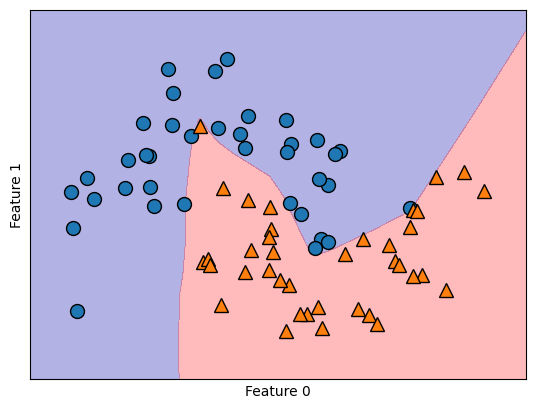

In [8]:
mlp = MLPClassifier(solver="lbfgs", random_state=0)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

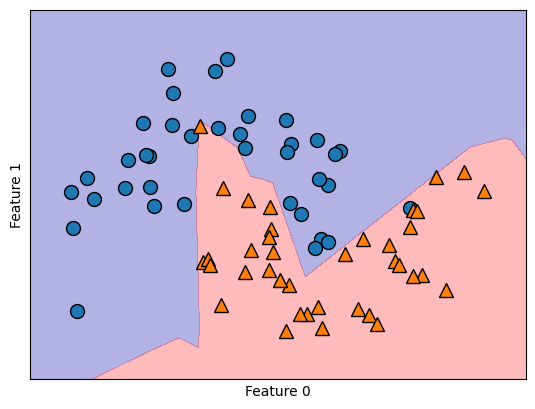

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=[10, 10], solver="lbfgs", random_state=0)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

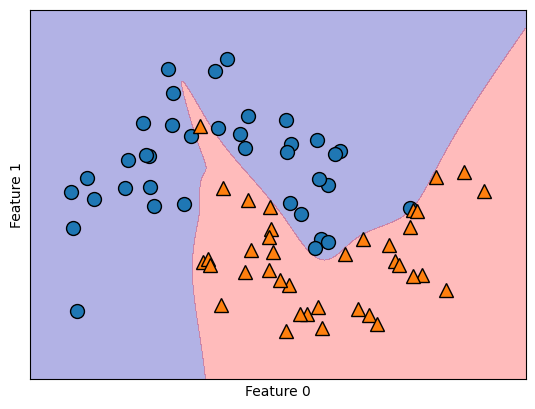

In [16]:
mlp = MLPClassifier(max_iter=300, hidden_layer_sizes=[10, 10], activation="tanh", solver="lbfgs", random_state=0)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

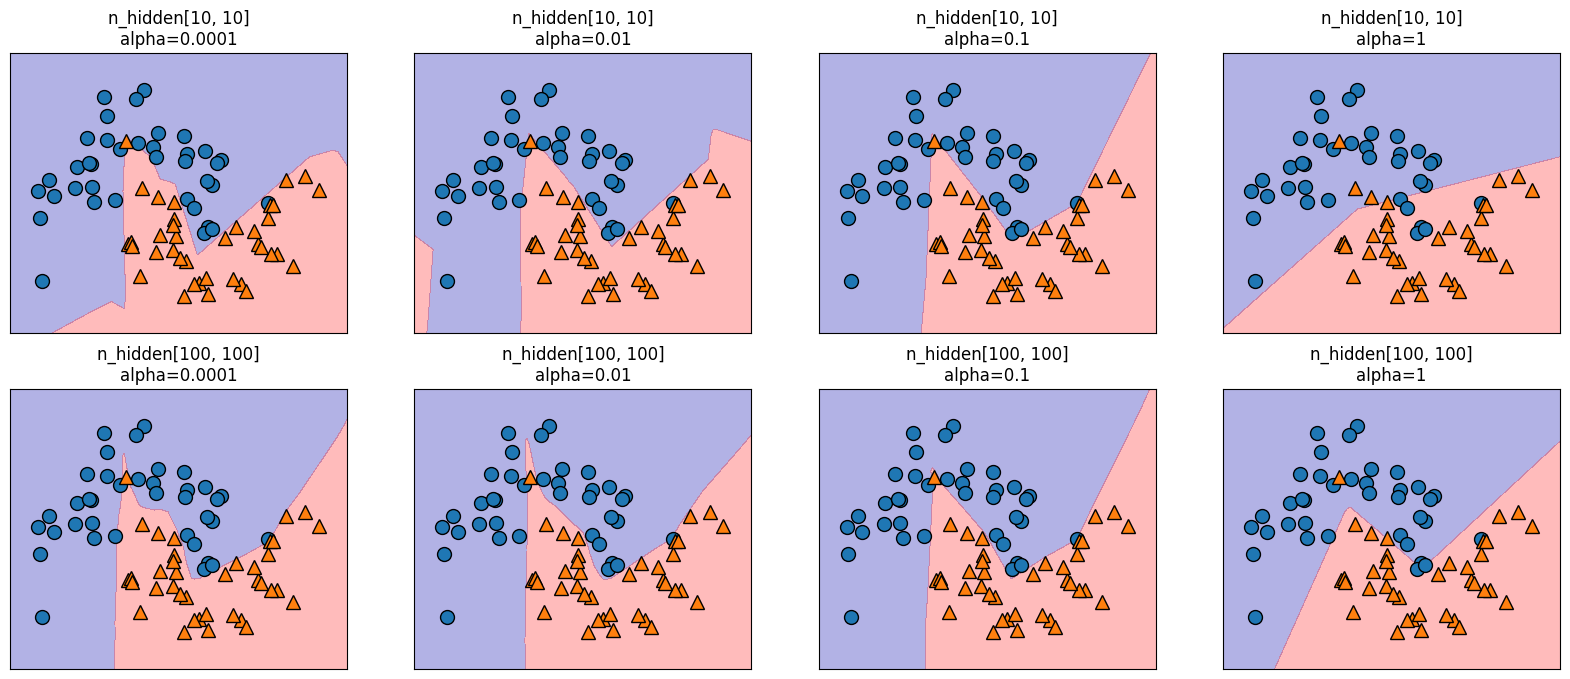

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(max_iter=700, solver="lbfgs", random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title(f"n_hidden[{n_hidden_nodes}, {n_hidden_nodes}]\nalpha={alpha}")

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

In [42]:
cancer = load_breast_cancer()

In [44]:
print(f"Cancer data per-feature maxima: \n{cancer["data"].max(axis=0)}")

Cancer data per-feature maxima: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [79]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state=0)

In [83]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print(f"Accuracy on train set: {mlp.score(X_train, y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test, y_test)}")

Accuracy on train set: 0.9389671361502347
Accuracy on test set: 0.916083916083916


In [81]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [95]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print(f"Accuracy on train set: {mlp.score(X_train_scaled, y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test_scaled, y_test)}")

Accuracy on train set: 0.9906103286384976
Accuracy on test set: 0.965034965034965


c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [94]:
mlp = MLPClassifier(max_iter=349, random_state=0)
mlp.fit(X_train_scaled, y_train)
print(f"Accuracy on train set: {mlp.score(X_train_scaled, y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test_scaled, y_test)}")

Accuracy on train set: 1.0
Accuracy on test set: 0.972027972027972


In [122]:
mlp = MLPClassifier(max_iter=300, hidden_layer_sizes=[10, 10, 10], random_state=0, alpha=1)
mlp.fit(X_train_scaled, y_train)
print(mlp.alpha)
print(f"Accuracy on train set: {mlp.score(X_train_scaled, y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test_scaled, y_test)}")

1
Accuracy on train set: 0.9906103286384976
Accuracy on test set: 0.972027972027972


c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [125]:
mlp.intercepts_

[array([ 0.68277725,  0.62103744,  0.36587688,  0.0021568 ,  0.25386347,
         0.17374091,  0.10630223,  0.00608088,  0.557063  , -0.09759752]),
 array([-0.59929385,  0.47252615, -0.47315115,  0.21084539, -0.37672516,
         0.18831986, -0.02321607,  0.02093574, -0.35497093,  0.42172468]),
 array([ 0.3344952 ,  0.15227679, -0.15279017,  0.14807856, -0.08713684,
        -0.19329638,  0.08268916,  0.59677889, -0.17024357,  0.06914914]),
 array([-0.61547171])]

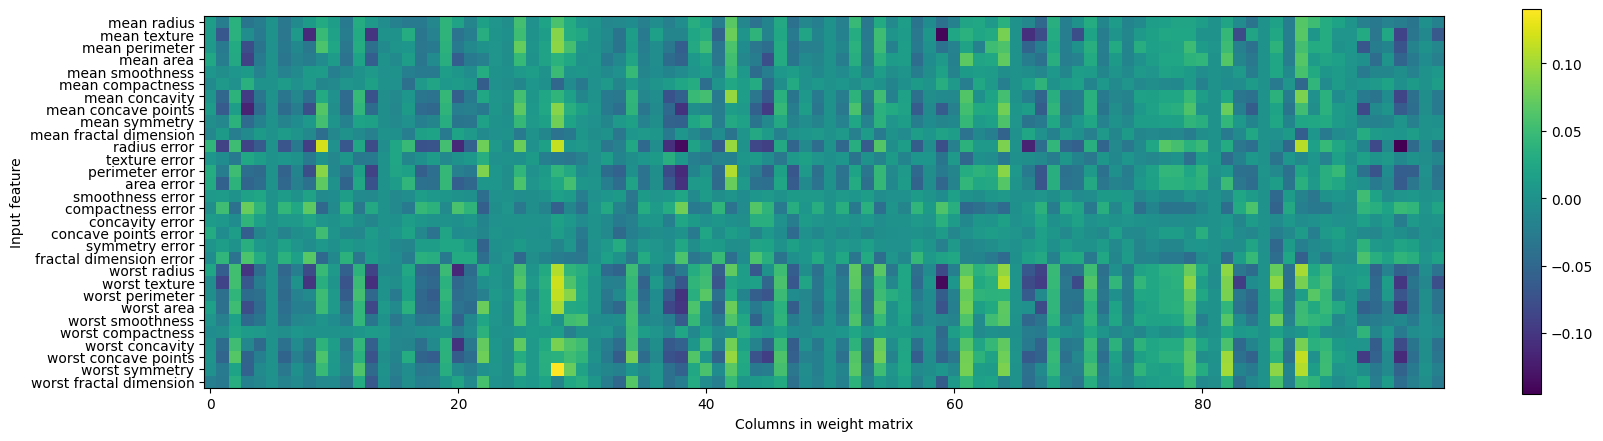

In [114]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation="none", cmap="viridis")
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()